In [165]:

# import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [166]:
#! cd "C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019"
# load the Repair_cafe data set into data_set_final database object
data_set_ORC = pd.ExcelFile(r"C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019\data_set.xlsx")
data_set_final=data_set_ORC.parse("Sheet1")

In [167]:
# look at the data set
print(data_set_final.shape)
# remove the null items
data_set_final_2=data_set_final[data_set_final.iloc[:,1].isnull()!=True]
data_set_final_2.shape

(19095, 17)


(19049, 17)

In [168]:
# define the columns heads by the first line
data_set_header= data_set_final_2.columns
print(data_set_header)

Index(['Registration number', 'Kind of product', 'Category', 'Brand',
       'Build year (estimated)', 'Model, type or serial number',
       'Fault + probable cause', 'Defect found', 'Repaired: yes/half/no',
       'If yes: what did you do to repair it?',
       'If half: what did you do, which advice did you give?',
       'If no: why could you not repair it?',
       'Reparability score (1=difficult, 10=easy)',
       'Was repair information available?',
       'If yes: where did it come from, manufacturer or made by users?',
       'Source of repair information?', 'Hint'],
      dtype='object')


In [169]:
#exploration1: PRODUCT Kind of Product
data_set_final_2.groupby(by="Kind of product").count().iloc[:,0].sort_values(ascending = False).head(5)

Kind of product
Coffee maker      1535
Trousers/pants    1078
Bicycle           1046
Vacuum cleaner    1027
Lamp/lighting      902
Name: Registration number, dtype: int64

In [170]:
#there are 638 different kinds of products
# the 5 most repaired product Category are Coffee Maker, Trousers/pants, Bicycle, Vacuum cleaner and Lamp/lighting

In [171]:
#exploration2: PRODUCT Category
data_set_final_2.groupby(by="Category").count().iloc[:,0].sort_values(ascending = False)

Category
Household appliances electric        7123
Textile                              2686
Display and sound equipment          2601
Other                                1743
Computers/phones                     1307
Bicycles                             1296
Tools electric                        895
Household appliances non-electric     532
Tools non-electric                    329
Toys electric                         235
Furniture                             197
Toys non-electric                     104
Category                                1
Name: Registration number, dtype: int64

In [172]:
# there are 10 categories of products
# the 5 most repaired ones are "Household appliances electric", "Textile", "Display and SOund Equipment", "Other", and "Computers/phones"

In [173]:
#exploration3: BRANDS
print(data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).size)
data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).head(6)

2003


Brand
Unknown/n.a.    7393
Philips         1962
Sony             363
Bosch            319
Tefal            265
Samsung          239
Name: Registration number, dtype: int64

In [174]:
# amongst the 2003 brands registered the 5 most repaired are Philips, Sony, Bosch Tefal and Samsung

In [175]:
# exploration4: REPAIR SUCCESS
data_set_final_2.groupby(by="Repaired: yes/half/no").count().iloc[:,0].sort_values(ascending=False)[0:3]/data_set_final_2.shape[0]*100

Repaired: yes/half/no
yes     64.712058
no      22.919838
half    12.347105
Name: Registration number, dtype: float64

In [176]:
#64% of all products have been considered as repaired, 23% have not been successfully repaired, 12% have been "half" repaired

In [177]:
# what are the brands with the highest repair success?
data_repair_success=data_set_final_2.groupby(by=["Brand","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success=data_repair_success.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Brand")
data_repair_success["total"]=data_repair_success.sum(axis=1)
data_repair_success = data_repair_success.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success= data_repair_success.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success["percent repaired"]=data_repair_success["yes"]/data_repair_success["total"]*100
#we remove the brands with less than 10 products repaired
data_repair_success=data_repair_success[data_repair_success["total"]>50]
print(data_repair_success.shape)
# 10 brands the most repairable
data_repair_success_best=data_repair_success.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_best)

(40, 5)
Repaired: yes/half/no   half      no     yes   total  percent repaired
Brand                                                                 
Batavus                  5.0     5.0    90.0   100.0         90.000000
Giant                    NaN     7.0    61.0    68.0         89.705882
Gazelle                  8.0    10.0   149.0   167.0         89.221557
Unknown/n.a.           585.0  1027.0  5780.0  7392.0         78.192641
Pfaff                    9.0     8.0    52.0    69.0         75.362319
Sparta                   4.0    10.0    42.0    56.0         75.000000
Singer                  14.0    17.0    77.0   108.0         71.296296
Bestron                  5.0    13.0    38.0    56.0         67.857143
Miele                   17.0    67.0   148.0   232.0         63.793103
Philips                231.0   555.0  1175.0  1961.0         59.918409
Hema                     5.0    18.0    34.0    57.0         59.649123
Princess                 8.0    31.0    57.0    96.0         59.37500

In [178]:
# what are the kind of products with the highest repair success?
data_repair_success_kop=data_set_final_2.groupby(by=["Kind of product","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_kop=data_repair_success_kop.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Kind of product")
data_repair_success_kop["total"]=data_repair_success_kop.sum(axis=1)
data_repair_success_kop = data_repair_success_kop.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_kop= data_repair_success_kop.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_kop["percent repaired"]=data_repair_success_kop["yes"]/data_repair_success_kop["total"]*100
#we remove the product types with less than 10 products repaired
data_repair_success_kop=data_repair_success_kop[data_repair_success_kop["total"]>100]
print(data_repair_success_kop.shape)
# product types per repair rate
data_repair_success_kop=data_repair_success_kop.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_kop)

(42, 5)
Repaired: yes/half/no            half     no     yes   total  percent repaired
Kind of product                                                               
Knife/knives/scissors             3.0    2.0   269.0   274.0         98.175182
Shirt                             NaN    2.0   100.0   102.0         98.039216
Trousers/pants                   14.0   17.0  1047.0  1078.0         97.124304
Pruning shears / Garden shears    2.0    5.0   136.0   143.0         95.104895
Sweater                           2.0    2.0    97.0   102.0         95.098039
Blouse                            2.0    4.0   108.0   114.0         94.736842
Dress                             5.0    2.0   122.0   129.0         94.573643
Coat                             12.0   13.0   310.0   335.0         92.537313
Bicycle lighting                  3.0    6.0    92.0   101.0         91.089109
Bag                               5.0    7.0    99.0   111.0         89.189189
Bicycle                          47.0   78.0

In [179]:
# what are the product Category with the highest repair success?
data_repair_success_C=data_set_final_2.groupby(by=["Category","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_C=data_repair_success_C.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Category")
data_repair_success_C["total"]=data_repair_success_C.sum(axis=1)
data_repair_success_C = data_repair_success_C.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_C= data_repair_success_C.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_C["percent repaired"]=data_repair_success_C["yes"]/data_repair_success_C["total"]*100
print(data_repair_success_C.shape)
# sort by repair rate
data_repair_success_C=data_repair_success_C.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_C)

(13, 5)
Repaired: yes/half/no               half      no     yes   total  \
Category                                                           
Textile                             61.0    75.0  2549.0  2686.0   
Tools non-electric                  14.0    16.0   299.0   329.0   
Bicycles                            65.0   107.0  1124.0  1296.0   
Household appliances non-electric   52.0    79.0   401.0   532.0   
Furniture                           30.0    21.0   146.0   197.0   
Other                              183.0   332.0  1227.0  1742.0   
Toys non-electric                   12.0    24.0    68.0   104.0   
Household appliances electric      928.0  2090.0  4105.0  7123.0   
Toys electric                       33.0    73.0   129.0   235.0   
Tools electric                     123.0   288.0   484.0   895.0   
Computers/phones                   352.0   353.0   602.0  1307.0   
Display and sound equipment        499.0   908.0  1193.0  2600.0   
Category                             NaN

In [16]:
# one can notice the impact of "being electric" on the reparability of a product category. 
# can this be linked to the age (i.e. non electric stuff are older...)

In [180]:
# Exploration5 : BUILD YEAR
data_set_final_2.dtypes
#Build year is an object type. Let's cast it to a float value
data_set_final_2.loc[:,"my_build_year"]=pd.to_numeric(data_set_final_2["Build year (estimated)"], errors='coerce')
#clean the "my_build_year" column by removing values out of 1800 - 2019, which represent 1 half of the values
data_set_final_2.loc[:,"my_build_year"]=[my_year if (my_year>1800 and my_year<2020) else np.nan for my_year in data_set_final_2["my_build_year"]]
#let's now explore the mean age of the categories
data_repair_success_C_Y=data_set_final_2.groupby(by=["Category"]).mean(numeric_only=True)
data_repair_success_C_Y.loc[:,"my_build_year"]=[my_year if np.isnan(my_year)==True else round(my_year,1) for my_year in data_repair_success_C_Y["my_build_year"]]
data_repair_success_C_Y

,my_build_year
Category,
Bicycles,2005.9
Category,NaN
Computers/phones,2010.4
Display and sound equipment,2001.3
Furniture,1993.1
Household appliances electric,2006.6
Household appliances non-electric,1994.0
Other,1999.2
Textile,2010.4


In [181]:
#let's group the 2 databases together into one
data_repair_success_C_final=pd.merge(data_repair_success_C,data_repair_success_C_Y, how="left", on="Category")
#we remove the useless last line
data_repair_success_C_final=data_repair_success_C_final.drop(['Category'])
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year
Category,,,,,,
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4
Tools non-electric,14.0,16.0,299.0,329.0,90.881459,2001.8
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2
Toys non-electric,12.0,24.0,68.0,104.0,65.384615,1994.9
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6
Toys electric,33.0,73.0,129.0,235.0,54.893617,2007.6


In [182]:
#let's improve the table with more features
# electric of not electric
data_repair_success_C_final.loc[:,"electric"]=["YES" if (" electric" in my_cat)==True else "NO" for my_cat in data_repair_success_C_final.index ]
data_repair_success_C_final.loc[data_repair_success_C_final.tail(2).index,"electric"]="YES"
data_repair_success_C_final=data_repair_success_C_final.sort_index(inplace=False)
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year,electric
Category,,,,,,,
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9,NO
Computers/phones,352.0,353.0,602.0,1307.0,46.059679,2010.4,YES
Display and sound equipment,499.0,908.0,1193.0,2600.0,45.884615,2001.3,YES
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1,NO
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6,YES
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0,NO
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2,NO
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4,NO
Tools electric,123.0,288.0,484.0,895.0,54.078212,2005.6,YES


<function matplotlib.pyplot.show(*args, **kw)>

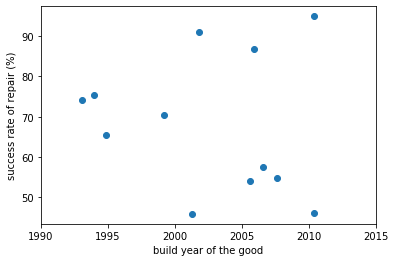

In [183]:
#let's plot everything

plt.scatter(data_repair_success_C_final["my_build_year"], data_repair_success_C_final["percent repaired"])
plt.xlabel("build year of the good")
plt.ylabel("success rate of repair (%)")
plt.xlim(1990, 2015)
plt.show

In [184]:
# explore reparability score
data_set_final_2.groupby(by='Reparability score (1=difficult, 10=easy)').count().iloc[:,0].sort_values(ascending = False)
#what is the mean reparability score per category ?
#first change the reparability score from object to an int value
data_set_final_2.loc[:,"my_reparability"]=pd.to_numeric(data_set_final_2.loc[:,"Reparability score (1=difficult, 10=easy)"], errors='coerce')
data_repar_year_C=data_set_final_2.groupby(by=['Category',"my_build_year"]).median().reset_index()
data_repar_year_C

,Category,my_build_year,my_reparability
0,Bicycles,1950.0,5.0
1,Bicycles,1960.0,8.0
2,Bicycles,1963.0,6.0
3,Bicycles,1964.0,8.0
4,Bicycles,1965.0,10.0
...,...,...,...
489,Toys non-electric,2013.0,10.0
490,Toys non-electric,2014.0,9.0
491,Toys non-electric,2016.0,8.0
492,Toys non-electric,2017.0,8.0


In [185]:
# most of repairs are easy ones (7 to 10 reparability score)
# the mean reparability scores are lowest 6.3 (display and sound equipment), and highest 8.8 (tools non -electric)

In [186]:
#explore the other features - can they be used to improve the algo?
data_set_final_2.groupby(by='Fault + probable cause').count().iloc[:,-1].sort_values(ascending= False)[0:20]
# does not provide a lot of insights in Deutsch...
data_set_final_2.groupby(by='Defect found').count().iloc[:,-1].sort_values(ascending= False)[0:20]
# does not provide a lot of insights in Deutsch...

Defect found
doet het niet         183
Bot                   118
idem                  103
werkt niet             95
Doet het niet          93
doet niets             90
Te lang                87
defect                 75
Onbekend               74
geen                   68
Doet het niet meer     68
te lang                59
vuil                   58
lekke band             48
schakelaar defect      42
schakelaar             41
Werkt niet             40
doet niets meer        37
bot                    35
slijtage               34
Name: my_reparability, dtype: int64

In [299]:
# creating a machine learning algorithm to predict the repair rate of a machine ?
# think about the structure and the features to use
# existing features to use would be my_build year<Brand<KindofProduct<Category put in the proper format. We drop the other columns
data_set_final_ML=data_set_final_2.drop(columns=['Registration number', 'Model, type or serial number', 'Fault + probable cause', 'Defect found'])
data_set_final_ML=data_set_final_ML.drop(columns=['If yes: what did you do to repair it?','If half: what did you do, which advice did you give?', 'If no: why could you not repair it?' ])
data_set_final_ML=data_set_final_ML.drop(columns=['Was repair information available?','If yes: where did it come from, manufacturer or made by users?','Source of repair information?','Hint'])
data_set_final_ML=data_set_final_ML.drop(columns=['Build year (estimated)', 'Reparability score (1=difficult, 10=easy)'])

# methodology to fill the NaN should be considered
data_set_final_ML.isna().sum()
# we drop the few lines of "brand" and "Repaired" where there are so few 
data_set_final_ML=data_set_final_ML.dropna(subset=['Brand', 'Repaired: yes/half/no'])
print(data_set_final_ML.isna().sum())

# we fill the my_reparability and the my_build_year with the median values per category
my_build_year_median=round(data_set_final_ML.groupby(by="Kind of product").mean().loc[:,'my_build_year'],0).reset_index()
my_reparability_median=round(data_set_final_ML.groupby(by="Kind of product").mean().loc[:,'my_reparability'],0).reset_index()
data_set_final_ML=data_set_final_ML.reset_index()

for i in range(data_set_final_ML.shape[0]):
    if np.isnan(data_set_final_ML.loc[i,"my_build_year"])==True:
        for j in range (my_build_year_median.shape[0]):
            if data_set_final_ML.loc[i,"Kind of product"] == my_build_year_median.loc[j, "Kind of product"]:
                data_set_final_ML.loc[i,"my_build_year"]=my_build_year_median.loc[j, "my_build_year"]
 
for i in range(data_set_final_ML.shape[0]):
    if np.isnan(data_set_final_ML.loc[i,"my_reparability"])==True:
        for j in range (my_reparability_median.shape[0]):
            if data_set_final_ML.loc[i,"Kind of product"] == my_reparability_median.loc[j, "Kind of product"]:
                data_set_final_ML.loc[i,"my_reparability"]=my_reparability_median.loc[j, "my_reparability"]

print(data_set_final_ML.isna().sum())



Kind of product              0
Category                     0
Brand                        0
Repaired: yes/half/no        0
my_build_year            10416
my_reparability           3726
dtype: int64
index                      0
Kind of product            0
Category                   0
Brand                      0
Repaired: yes/half/no      0
my_build_year            338
my_reparability           35
dtype: int64


In [300]:
#we replace the remaining values by the mean values of my_build_year and my_reparability
values={"my_build_year":np.mean(data_set_final_ML.loc[:,"my_build_year"]),"my_reparability":np.mean(data_set_final_ML.loc[:,"my_reparability"])}
data_set_final_ML.fillna(value=values)

data_set_final_ML=data_set_final_ML.dropna(subset=['my_build_year', 'my_reparability'])
print(data_set_final_ML.isna().sum())

index                    0
Kind of product          0
Category                 0
Brand                    0
Repaired: yes/half/no    0
my_build_year            0
my_reparability          0
dtype: int64


In [301]:
# we remove the textile, Furniture and Other categories which are out of scope
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Textile"].index)
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Other"].index)
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Furniture"].index)
data_set_final_ML.shape

(14263, 7)

In [302]:
# we explore the size of class observations category/kind of product / brand
data_set_final_ML.groupby(by=['Category','Kind of product', 'Brand']).count().iloc[:,-1].sort_values(ascending=False).head(10)

#we create a counter to get the size of observations associated to each one and so be able to remove the less frequent
#we create a dumb column for class
data_set_final_ML["my_dumb_column"]=data_set_final_ML["Category"]+data_set_final_ML["Kind of product"]+data_set_final_ML["Brand"]
my_counts=data_set_final_ML["my_dumb_column"].value_counts()
#we set a threshold
threshold = 2
data_set_final_ML_good= data_set_final_ML[~data_set_final_ML['my_dumb_column'].isin(my_counts[my_counts < threshold].index)]
data_set_final_ML_good=data_set_final_ML_good.drop(columns="my_dumb_column")
data_set_final_ML_good.shape

#we keep 9547 observations for a threshold of 5
# we keep 11566 observations for a threshold of 2

(11566, 7)

In [303]:
# we are now good to start the ML model build


In [304]:
# we decide to simplify the output by only have 2 categories: repaired = yes or not repaired = no
data_set_final_ML_good["Repaired: yes/half/no"]=["YES" if my_repair == "yes" else "NO" for my_repair in data_set_final_ML_good["Repaired: yes/half/no"] ]


In [305]:
# we create new features: Electric = Yes or No based on product category first
data_set_final_ML_good["Electric"]=["YES" if my_category in ['Computers/phones','Display and sound equipment','Household appliances electric','Tools electric','Toys electric'] else "NO" for my_category in data_set_final_ML_good["Category"]]
data_set_final_ML_good.shape

(11566, 8)

In [306]:
# we create an age category feature 
data_set_final_ML_good["age"]=2019-data_set_final_ML_good["my_build_year"]
data_set_final_ML_good["age_cat"]=["fresh" if my_age<2 else "ado" if my_age<8 and my_age>=2 else "old" if my_age<20 and my_age>=8 else "very_old" for my_age in data_set_final_ML_good["age"]]
data_set_final_ML_good

,index,Kind of product,Category,Brand,Repaired: yes/half/no,my_build_year,my_reparability,Electric,age,age_cat
2,4,Drilling machine,Tools electric,Black & Decker,YES,2010.0,7.0,YES,9.0,old
3,5,Vacuum cleaner,Household appliances electric,AEG,NO,2013.0,8.0,YES,6.0,ado
7,9,Vacuum cleaner,Household appliances electric,Dyson,YES,2017.0,8.0,YES,2.0,ado
8,10,Other,Household appliances electric,Onbekend,YES,2016.0,8.0,YES,3.0,ado
9,11,Other,Household appliances electric,Onbekend,NO,2016.0,4.0,YES,3.0,ado
...,...,...,...,...,...,...,...,...,...,...
19031,19080,Vacuum cleaner,Household appliances electric,Miele,YES,1995.0,8.0,YES,24.0,very_old
19033,19082,Lamp/lighting,Household appliances electric,Unknown/n.a.,YES,1990.0,7.0,YES,29.0,very_old
19037,19086,Lamp/lighting,Household appliances electric,Unknown/n.a.,YES,1990.0,8.0,YES,29.0,very_old
19038,19087,Lamp/lighting,Household appliances electric,Unknown/n.a.,YES,1990.0,9.0,YES,29.0,very_old


In [307]:
#We import the appropriate packages
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

SEED=222

In [308]:
# we can create labels for the categorical variables
data_set_final_ML_good.Category=pd.Categorical(data_set_final_ML_good.Category)
data_set_final_ML_good["Category_label"]=data_set_final_ML_good.Category.cat.codes
data_set_final_ML_good["Kind of product"]=pd.Categorical(data_set_final_ML_good["Kind of product"])
data_set_final_ML_good["Kindofproduct_label"]=data_set_final_ML_good["Kind of product"].cat.codes
data_set_final_ML_good["Brand"]=pd.Categorical(data_set_final_ML_good["Brand"])
data_set_final_ML_good["Brand_label"]=data_set_final_ML_good["Brand"].cat.codes
data_set_final_ML_good["Repaired: yes/half/no"]=pd.Categorical(data_set_final_ML_good["Repaired: yes/half/no"])
data_set_final_ML_good["Repaired_label"]=data_set_final_ML_good["Repaired: yes/half/no"].cat.codes
data_set_final_ML_good["Electric"]=pd.Categorical(data_set_final_ML_good["Electric"])
data_set_final_ML_good["Electric_label"]=data_set_final_ML_good["Electric"].cat.codes
data_set_final_ML_good["my_reparability"]=pd.Categorical(data_set_final_ML_good["my_reparability"])
data_set_final_ML_good["my_repar_label"]=data_set_final_ML_good["my_reparability"].cat.codes
data_set_final_ML_good["age_cat"]=pd.Categorical(data_set_final_ML_good["age_cat"])
data_set_final_ML_good["age_cat_label"]=data_set_final_ML_good["age_cat"].cat.codes

data_set_final_ML_good.head(10)


,index,Kind of product,Category,Brand,Repaired: yes/half/no,my_build_year,my_reparability,Electric,age,age_cat,Category_label,Kindofproduct_label,Brand_label,Repaired_label,Electric_label,my_repar_label,age_cat_label
2,4,Drilling machine,Tools electric,Black & Decker,YES,2010.0,7.0,YES,9.0,old,5,80,46,1,1,7,2
3,5,Vacuum cleaner,Household appliances electric,AEG,NO,2013.0,8.0,YES,6.0,ado,3,241,0,0,1,8,0
7,9,Vacuum cleaner,Household appliances electric,Dyson,YES,2017.0,8.0,YES,2.0,ado,3,241,98,1,1,8,0
8,10,Other,Household appliances electric,Onbekend,YES,2016.0,8.0,YES,3.0,ado,3,166,251,1,1,8,0
9,11,Other,Household appliances electric,Onbekend,NO,2016.0,4.0,YES,3.0,ado,3,166,251,0,1,4,0
10,12,Drilling machine,Tools electric,Bosch,NO,2016.0,8.0,YES,3.0,ado,5,80,51,0,1,8,0
11,13,Other,Display and sound equipment,Sony,YES,2000.0,8.0,YES,19.0,old,2,166,324,1,1,8,2
12,14,Vacuum cleaner,Household appliances electric,AEG Electrolux,YES,2009.0,8.0,YES,10.0,old,3,241,1,1,1,8,2
19,21,Vacuum cleaner,Household appliances electric,Miele,NO,2000.0,7.0,YES,19.0,old,3,241,226,0,1,7,2
20,22,Microwave,Household appliances electric,Severin,NO,2018.0,8.0,YES,1.0,fresh,3,157,312,0,1,8,1


In [309]:
# we create a combined feature which kind of product x age using the labels
data_set_final_ML_good.loc[:,"comb_kop_age"]=(data_set_final_ML_good.Kindofproduct_label+1)*(data_set_final_ML_good.age_cat_label+1)
data_set_final_ML_good.loc[:,"comb_cat_age"]=(data_set_final_ML_good.Category_label+1)*(data_set_final_ML_good.age_cat_label+1)
data_set_final_ML_good.head(10)

,index,Kind of product,Category,Brand,Repaired: yes/half/no,my_build_year,my_reparability,Electric,age,age_cat,Category_label,Kindofproduct_label,Brand_label,Repaired_label,Electric_label,my_repar_label,age_cat_label,comb_kop_age,comb_cat_age
2,4,Drilling machine,Tools electric,Black & Decker,YES,2010.0,7.0,YES,9.0,old,5,80,46,1,1,7,2,243,18
3,5,Vacuum cleaner,Household appliances electric,AEG,NO,2013.0,8.0,YES,6.0,ado,3,241,0,0,1,8,0,242,4
7,9,Vacuum cleaner,Household appliances electric,Dyson,YES,2017.0,8.0,YES,2.0,ado,3,241,98,1,1,8,0,242,4
8,10,Other,Household appliances electric,Onbekend,YES,2016.0,8.0,YES,3.0,ado,3,166,251,1,1,8,0,167,4
9,11,Other,Household appliances electric,Onbekend,NO,2016.0,4.0,YES,3.0,ado,3,166,251,0,1,4,0,167,4
10,12,Drilling machine,Tools electric,Bosch,NO,2016.0,8.0,YES,3.0,ado,5,80,51,0,1,8,0,81,6
11,13,Other,Display and sound equipment,Sony,YES,2000.0,8.0,YES,19.0,old,2,166,324,1,1,8,2,501,9
12,14,Vacuum cleaner,Household appliances electric,AEG Electrolux,YES,2009.0,8.0,YES,10.0,old,3,241,1,1,1,8,2,726,12
19,21,Vacuum cleaner,Household appliances electric,Miele,NO,2000.0,7.0,YES,19.0,old,3,241,226,0,1,7,2,726,12
20,22,Microwave,Household appliances electric,Severin,NO,2018.0,8.0,YES,1.0,fresh,3,157,312,0,1,8,1,316,8


In [310]:
#check of the datatypes
data_set_final_ML_good.dtypes

index                       int64
Kind of product          category
Category                 category
Brand                    category
Repaired: yes/half/no    category
my_build_year             float64
my_reparability          category
Electric                 category
age                       float64
age_cat                  category
Category_label               int8
Kindofproduct_label         int16
Brand_label                 int16
Repaired_label               int8
Electric_label               int8
my_repar_label               int8
age_cat_label                int8
comb_kop_age                int16
comb_cat_age                 int8
dtype: object

In [311]:
#check of the repaired_label
data_set_final_ML_good.groupby(by="Repaired_label").count().iloc[:,-1]/data_set_final_ML_good.shape[0]
#59% repaired, 41% not repaired

Repaired_label
0    0.410081
1    0.589919
Name: comb_cat_age, dtype: float64

In [312]:
# we drop the first not cat columns
data_set_final_ML_good_2=data_set_final_ML_good.drop(columns=["index","Kind of product","Category","Brand","Electric", "age", "age_cat","my_reparability"])

data_set_final_ML_good_2.dtypes

Repaired: yes/half/no    category
my_build_year             float64
Category_label               int8
Kindofproduct_label         int16
Brand_label                 int16
Repaired_label               int8
Electric_label               int8
my_repar_label               int8
age_cat_label                int8
comb_kop_age                int16
comb_cat_age                 int8
dtype: object

In [313]:
# we add more features that count the occurence of the categorical variables (to differentiate rare and frequent features)
#in both test and train datasets
for i in data_set_final_ML_good_2.columns:
    counts = data_set_final_ML_good_2.loc[:,i].value_counts().to_dict()
    data_set_final_ML_good_2[''+i+'_counts'] = data_set_final_ML_good_2.loc[:,i].map(counts)

In [314]:
data_set_final_ML_good_2.columns

Index(['Repaired: yes/half/no', 'my_build_year', 'Category_label',
       'Kindofproduct_label', 'Brand_label', 'Repaired_label',
       'Electric_label', 'my_repar_label', 'age_cat_label', 'comb_kop_age',
       'comb_cat_age', 'Repaired: yes/half/no_counts', 'my_build_year_counts',
       'Category_label_counts', 'Kindofproduct_label_counts',
       'Brand_label_counts', 'Repaired_label_counts', 'Electric_label_counts',
       'my_repar_label_counts', 'age_cat_label_counts', 'comb_kop_age_counts',
       'comb_cat_age_counts'],
      dtype='object')

In [391]:
#let's build the train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_good=data_set_final_ML_good_2
X=train_good.drop(['Repaired: yes/half/no','Repaired_label','Repaired: yes/half/no_counts','Repaired_label_counts'],axis=1)
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X.values)
#print(X.columns)
print(X_scale.shape)
Y=le.fit_transform(train_good['Repaired_label'])
print(Y.shape)
X_train,X_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=2012)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
print(y_test.dtype)

(11566, 18)
(11566,)
(8096, 18) (3470, 18) (8096,) (3470,)
int64


In [392]:
#let's try to do it with multiclass logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.7164031620553359
0.7184438040345821


In [393]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

gb = GradientBoostingClassifier(n_estimators=25, random_state=2018)
rf = RandomForestClassifier(n_estimators=10, max_depth=5,min_samples_split=2,random_state=2012)
knn = KNeighborsClassifier(n_neighbors=20,weights='distance')
nn = MLPClassifier((50,50,50),early_stopping=False, max_iter=200, random_state=2010, solver="lbfgs")

Results = pd.DataFrame({'Model': [],'Accuracy Score': []})

gb.fit(X_train, y_train)
Y_pred= gb.predict(X_test)
res = pd.DataFrame({"Model":['GradientBoostingClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

rf.fit(X_train, y_train)
Y_pred= rf.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

knn.fit(X_train, y_train)
Y_pred= knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

nn.fit(X_train, y_train)
Y_pred= nn.predict(X_test)
res = pd.DataFrame({"Model":['NeuralNetwork'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

Results

,Model,Accuracy Score
0,GradientBoostingClassifier,0.716715
0,RandomForestClassifier,0.720173
0,KNeighborsClassifier,0.678386
0,NeuralNetwork,0.718732


<function matplotlib.pyplot.show(*args, **kw)>

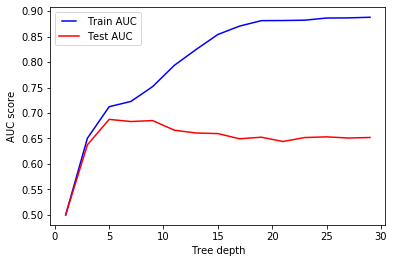

In [376]:
#depths exploration of the random forrest classifier
max_depths = np.arange(1,30,2)
train_results = []
test_results = []
for max_depth in max_depths:
   rf_opt = RandomForestClassifier(n_estimators=5, max_depth=max_depth, n_jobs=-1, min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

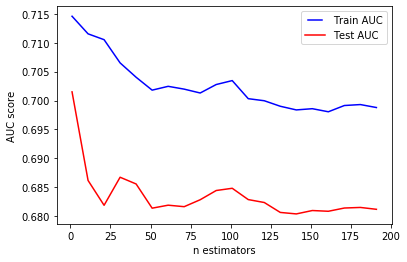

In [377]:
max_estimators = np.arange(1, 200,10)
train_results = []
test_results = []
for max_estim in max_estimators:
   rf_opt = RandomForestClassifier(n_estimators=max_estim, max_depth=5, n_jobs=-1,min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n estimators')
plt.show

In [394]:
#where do the bad prediction lay?
data_set_final_ML_good["predicted"]=nn.predict(X)

data_set_final_ML_good["good_prediction_status"]=["good" if int(data_set_final_ML_good.iloc[i,data_set_final_ML_good.columns.get_loc("Repaired_label")])==int(data_set_final_ML_good.iloc[i,data_set_final_ML_good.columns.get_loc("predicted")]) else "bad" for i in range(data_set_final_ML_good_2.shape[0])]
#data_set_final_ML_good[data_set_final_ML_good["good_prediction_status"]=="bad"].tail(20)
#print(data_set_final_ML_good.groupby(by="good_prediction_status").count().iloc[:,0])
data_set_final_ML_good.head(5)
#print(data_set_final_ML_good.groupby(by="predicted").count().iloc[:,0])
print(data_set_final_ML_good[data_set_final_ML_good["predicted"]==0].groupby(by="Category").count().iloc[:,-1])
print(data_set_final_ML_good[data_set_final_ML_good["predicted"]==0].shape)

Category
Bicycles                             1021
Computers/phones                     1092
Display and sound equipment          1996
Household appliances electric        5921
Household appliances non-electric     260
Tools electric                        596
Tools non-electric                     93
Toys electric                         150
Toys non-electric                      51
Name: good_prediction_status, dtype: int64
(11180, 21)


In [362]:
#the model is bad, it predicts very few "not repaired"

In [395]:
data_set_ML_predict_success = data_set_final_ML_good.groupby(by=["Category","good_prediction_status"]).count().reset_index()
data_set_ML_predict_success=data_set_ML_predict_success.pivot(values = "Kind of product", columns="good_prediction_status", index="Category")
data_set_ML_predict_success.loc[:,"pc_good"]=round(data_set_ML_predict_success["good"]/(data_set_ML_predict_success["bad"]+data_set_ML_predict_success["good"])*100,1)
data_set_ML_predict_success.sort_values(by="pc_good", ascending= False)


data_repair_success_C_2=data_set_final_2.groupby(by=["Category","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_C_2=data_repair_success_C_2.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Category")
data_repair_success_C_2["total"]=data_repair_success_C_2.sum(axis=1)
data_repair_success_C_2["pc_repaired"]=round(data_repair_success_C_2["yes"]/data_repair_success_C_2["total"]*100,1)

data_repair_success_C_final=pd.merge(data_repair_success_C_2,data_set_ML_predict_success, how="left", on="Category")
data_repair_success_C_final

,Repaired,half,ja,no,yes,total,pc_repaired,bad,good,pc_good
Category,,,,,,,,,,
Bicycles,NaN,65.0,NaN,107.0,1124.0,1296.0,86.7,929.0,179.0,16.2
Category,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Computers/phones,NaN,352.0,NaN,353.0,602.0,1307.0,46.1,498.0,594.0,54.4
Display and sound equipment,NaN,499.0,NaN,908.0,1193.0,2600.0,45.9,910.0,1086.0,54.4
Furniture,NaN,30.0,NaN,21.0,146.0,197.0,74.1,NaN,NaN,NaN
Household appliances electric,NaN,928.0,NaN,2090.0,4105.0,7123.0,57.6,3459.0,2462.0,41.6
Household appliances non-electric,NaN,52.0,NaN,79.0,401.0,532.0,75.4,213.0,154.0,42.0
Other,NaN,183.0,NaN,332.0,1227.0,1742.0,70.4,NaN,NaN,NaN
Textile,NaN,61.0,1.0,75.0,2549.0,2686.0,94.9,NaN,NaN,NaN


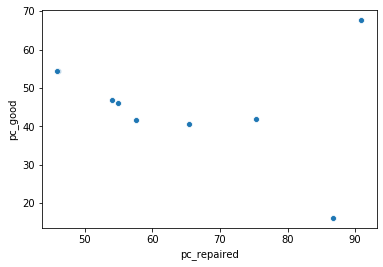

In [396]:
sns.scatterplot(x="pc_repaired",y="pc_good", data=data_repair_success_C_final)

In [47]:
# the model absolutely does not work: it predicts "can be repared" 99% of the time
# needs improvements! => needs more features to differentiate a reparable observation from a non reparable observation
#feature engineering performed
## add counts as labels to the train dataset - DONE with little improvement
## add data by setting threshold to 2 - DONE with no impact
## improve the (na) values replacement of my_reparability my_build_year by the mean of the "Kind of product" - DONE with little positive impact
## remove the "Furniture" category - DONE with little positive impact
## add a combined age_cat*category_label feature - DONE with little positive impact
## add a combined age_cat*kindofproduct_label feature - DONE with little positive impact
##MAJOR NOTE: we try different algorithm types to predict the reparability:
    # GradientBoost classifier and RandomForest classifier pushes towards "always reparable"
    # NN pushes towards "never reparable" (and is pretty unstable = dependent on the random seed
    # Kneighbors classifier offest pushes towards reparable with more prediction of cannot be repaired for some categories

